# Lab 5
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jpepper19/lab_05_JoshuaPepper.ipynb)

## Exercise 1: Calculating Distances with Functions

- Define a function `calculate_distance` that takes two geographic coordinates (latitude and longitude) and returns the distance between them using the Haversine formula.
- Use this function to calculate the distance between multiple pairs of coordinates.

In [1]:
import math

def calculate_distance(lat1, lon1, lat2, lon2):
    
    '''
    All of the latitude coordinates will be inputted in degrees.
    '''
    
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine Formula
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Radius of the Earth, found from NASA
    R = 6371.0
    
    distance = R * c
    return distance # in kilometers

In [2]:
calculate_distance(40.7128, -74.0060, 34.0522, -118.2437)

3935.746254609723

## Exercise 2: Batch Distance Calculation

- Create a function `batch_distance_calculation` that accepts a list of coordinate pairs and returns a list of distances between consecutive pairs.
- Test the function with a list of coordinates representing several cities.

In [3]:
def batch_distance_calculation(coords_list):
    distances = []
    for i in range(len(coords_list) - 1):
        lat1, lon1 = coords_list[i]
        lat2, lon2 = coords_list[i + 1]
        distances.append(calculate_distance(lat1, lon1, lat2, lon2))
    return distances

In [6]:
city_coordinates = [
    (41.8781, -87.6298),  # Chicago
    (29.7604, -95.3698),  # Houston
    (25.7617, -80.1918),   # Miami
    (-33.865143, 151.209900), # Sydney, NSW
    (13.736717, 100.523186) # Bankok, Thailand
]

distances = batch_distance_calculation(city_coordinates)
print("Distances between consecutive cities in kilometers:", distances)

Distances between consecutive cities in kilometers: [1515.8051067847966, 1556.7944991212414, 15025.92620816972, 7533.049065345116]


## Exercise 3: Creating and Using a Point Class

- Define a `Point` class to represent a geographic point with attributes `latitude`, `longitude`, and `name`.
- Add a method `distance_to` that calculates the distance from one point to another.
- Instantiate several `Point` objects and calculate the distance between them.

In [7]:
class Point:
    
    # Initalizes point class
    def __init__(self, latitude, longitude, name=""):
        self.latitude = latitude
        self.longitude = longitude
        self.name = name

    # distance_to function that utilizes code from Exercise 1
    def distance_to(self, other_point):

        lat1, lon1 = math.radians(self.latitude), math.radians(self.longitude)
        lat2, lon2 = math.radians(other_point.latitude), math.radians(other_point.longitude)
        
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        R = 6371.0  # Earth's radius in kilometers
        return R * c

    def __str__(self):
        """Returns a string representation of the Point."""
        return f"{self.name} ({self.latitude}, {self.longitude})"

In [10]:
chicago = Point(41.8781, -87.6298, "Chicago")
sydney = Point(-33.865143, 151.209900, "Sydney")
bankok = Point(13.736717, 100.523186, "Bankok")
nyc = Point(40.7128, -74.0060, "New York City")

print(f"Distance from {chicago} to {sydney}: {chicago.distance_to(sydney):.2f} km")
print(f"Distance from {bankok} to {nyc}: {bankok.distance_to(nyc):.2f} km")
print(f"Distance from {chicago} to {bankok}: {chicago.distance_to(bankok):.2f} km")

Distance from Chicago (41.8781, -87.6298) to Sydney (-33.865143, 151.2099): 14875.64 km
Distance from Bankok (13.736717, 100.523186) to New York City (40.7128, -74.006): 13934.35 km
Distance from Chicago (41.8781, -87.6298) to Bankok (13.736717, 100.523186): 13774.74 km


## Exercise 4: Reading and Writing Files

- Write a function `read_coordinates` that reads a file containing a list of coordinates (latitude, longitude) and returns them as a list of tuples.
- Write another function `write_coordinates` that takes a list of coordinates and writes them to a new file.
- Ensure that both functions handle exceptions, such as missing files or improperly formatted data.

In [14]:
sample_data = """35.6895,139.6917
34.0522,-118.2437
51.5074,-0.1278
-33.8688,151.2093
48.8566,2.3522"""

output_file = "coordinates.txt"

In [15]:
import os

def read_coordinates(file_path):
    
    coordinates = []
    try:
        with open(file_path, "r") as file:
            for line in file:
                parts = line.strip().split(",")  # Expecting format: "latitude,longitude"
                if len(parts) != 2:
                    print(f"Skipping invalid line: {line.strip()}")
                    continue
                try:
                    lat, lon = float(parts[0]), float(parts[1])
                    coordinates.append((lat, lon))
                except ValueError:
                    print(f"Skipping non-numeric data: {line.strip()}")
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except Exception as e:
        print(f"Unexpected error: {e}")
    
    return coordinates

def write_coordinates(file_path, coordinates):

    try:
        with open(file_path, "w") as file:
            for lat, lon in coordinates:
                file.write(f"{lat},{lon}\n")
        print(f"Coordinates successfully written to {file_path}")
    except Exception as e:
        print(f"Error writing to file: {e}")
        
input_file = "coordinates.txt"
output_file = "output_coordinates.txt"

# Read coordinates from a file
coords = read_coordinates(input_file)
print("Read Coordinates:", coords)

# Write coordinates to a new file
write_coordinates(output_file, coords)

Read Coordinates: [(35.6895, 139.6917), (34.0522, -118.2437), (51.5074, -0.1278), (-33.8688, 151.2093), (48.8566, 2.3522)]
Coordinates successfully written to output_coordinates.txt


## Exercise 5: Processing Coordinates from a File

- Create a function that reads coordinates from a file and uses the `Point` class to create `Point` objects.
- Calculate the distance between each consecutive pair of points and write the results to a new file.
- Ensure the function handles file-related exceptions and gracefully handles improperly formatted lines.

In [18]:
# Create a sample coordinates.txt file
sample_data = """35.6895,139.6917
34.0522,-118.2437
51.5074,-0.1278
-33.8688,151.2093
48.8566,2.3522"""

input_file = "coordinates.txt"
output_file = "distances.txt"

try:
    with open(output_file, "w") as file:
        file.write(sample_data)
    print(f"Sample file '{output_file}' has been created successfully.")
except Exception as e:
    print(f"An error occurred while creating the file: {e}")

Sample file 'distances.txt' has been created successfully.


In [17]:
# Utilizes Point class 
def read_points_from_file(file_path):
    """Reads a file of coordinates and returns a list of Point objects."""
    points = []
    try:
        with open(file_path, "r") as file:
            for line in file:
                parts = line.strip().split(",")  
                if len(parts) != 2:
                    print(f"Skipping invalid line: {line.strip()}")
                    continue
                try:
                    lat, lon = float(parts[0]), float(parts[1])
                    points.append(Point(lat, lon))
                except ValueError:
                    print(f"Skipping non-numeric data: {line.strip()}")
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except Exception as e:
        print(f"Unexpected error: {e}")
    
    return points

def calculate_and_write_distances(input_file, output_file):
    """Calculates distances between consecutive points and writes results to a new file."""
    points = read_points_from_file(input_file)
    if len(points) < 2:
        print("Not enough points to calculate distances.")
        return
    
    try:
        with open(output_file, "w") as file:
            file.write("Point 1, Point 2, Distance (km)\n")
            for i in range(len(points) - 1):
                distance = points[i].distance_to(points[i + 1])
                file.write(f"{points[i].name}, {points[i+1].name}, {distance:.2f} km\n")
        print(f"Distances successfully written to {output_file}")
    except Exception as e:
        print(f"Error writing to file: {e}")

In [19]:
calculate_and_write_distances(input_file, output_file)

Distances successfully written to distances.txt


## Exercise 6: Exception Handling in Data Processing

- Modify the `batch_distance_calculation` function to handle exceptions that might occur during the calculation, such as invalid coordinates.
- Ensure the function skips invalid data and continues processing the remaining data.

In [20]:
def batch_distance_calculation(coords_list):

    distances = []
    for i in range(len(coords_list) - 1):
        try:
            lat1, lon1 = coords_list[i]
            lat2, lon2 = coords_list[i + 1]
            distance = calculate_distance(lat1, lon1, lat2, lon2)
            # Added portion to skip invalid data
            if distance is not None:
                distances.append(distance)
        except (ValueError, TypeError, IndexError) as e:
            print(f"Skipping invalid coordinate pair: {coords_list[i]} -> {coords_list[i+1]} | Error: {e}")
    return distances

## Exercise 7: NumPy Array Operations and Geospatial Coordinates

In this exercise, you will work with NumPy arrays representing geospatial coordinates (latitude and longitude) and perform basic array operations.

1. Create a 2D NumPy array containing the latitude and longitude of the following cities: Tokyo (35.6895, 139.6917), New York (40.7128, -74.0060), London (51.5074, -0.1278), and Paris (48.8566, 2.3522).
2. Convert the latitude and longitude values from degrees to radians using np.radians().
3. Calculate the element-wise difference between Tokyo and the other cities' latitude and longitude in radians.

In [21]:
import numpy as np

# numpy 2D array
cities = np.array([
    [35.6895, 139.6917],  # Tokyo
    [40.7128, -74.0060],  # New York
    [51.5074, -0.1278],   # London
    [48.8566, 2.3522]     # Paris
])

# radians of the cities array
cities_radians = np.radians(cities)

tokyo_radians = cities_radians[0]  # Tokyo's coordinates in radians
differences = cities_radians - tokyo_radians  # Subtracting Tokyo's coordinates from all cities

# Printing results
print("Cities in Radians:\n", cities_radians)
print("\nElement-wise Differences in Radians (compared to Tokyo):\n", differences)

Cities in Radians:
 [[ 6.22899283e-01  2.43808010e+00]
 [ 7.10572408e-01 -1.29164837e+00]
 [ 8.98973719e-01 -2.23053078e-03]
 [ 8.52708531e-01  4.10536347e-02]]

Element-wise Differences in Radians (compared to Tokyo):
 [[ 0.          0.        ]
 [ 0.08767312 -3.72972847]
 [ 0.27607444 -2.44031063]
 [ 0.22980925 -2.39702647]]


## Exercise 8: Pandas DataFrame Operations with Geospatial Data

In this exercise, you'll use Pandas to load and manipulate a dataset containing city population data, and then calculate and visualize statistics.

1. Load the world cities dataset from this URL using Pandas: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Display the first 5 rows and check for missing values.
3. Filter the dataset to only include cities with a population greater than 1 million.
4. Group the cities by their country and calculate the total population for each country.
5. Sort the cities by population in descending order and display the top 10 cities.

In [22]:
import pandas as pd

url = 'https://github.com/opengeos/datasets/releases/download/world/world_cities.csv'
df = pd.read_csv(url)

In [23]:
# first five rows
df.head()

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.5833,32.5333,75000
1,2,Fort Portal,UGA,0.6710,30.2750,42670
2,3,Potenza,ITA,40.6420,15.7990,69060
3,4,Campobasso,ITA,41.5630,14.6560,50762
4,5,Aosta,ITA,45.7370,7.3150,34062


In [24]:
# Missing value
print(df.isnull().sum())

id            0
name          0
country       0
latitude      0
longitude     0
population    0
dtype: int64


In [26]:
df_filtered = df[df['population'] > 1000000]
df_filtered.head()

,id,name,country,latitude,longitude,population
97,98,Turin,ITA,45.07039,7.66996,1652000
103,104,Lille,FRA,50.64997,3.08001,1044000
123,124,San Bernardino,USA,34.12038,-117.30003,1745000
124,125,Bridgeport,USA,41.17998,-73.19996,1018000
126,127,Manchester,GBR,53.50042,-2.24799,2230000


In [32]:
country_population = df_filtered.groupby('country')['population'].sum().reset_index()
top_cities = df_filtered.sort_values(by='population', ascending=False)
top_cities.head(10)

,id,name,country,latitude,longitude,population
1239,1240,Tokyo,JPN,35.68502,139.75141,35676000
1224,1225,New York,USA,40.74998,-73.98002,19040000
1230,1231,Mexico City,MEX,19.44244,-99.13099,19028000
1240,1241,Mumbai,IND,19.01699,72.85699,18978000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1148,1149,Delhi,IND,28.66999,77.23000,15926000
1238,1239,Shanghai,CHN,31.21645,121.43650,14987000
1243,1244,Kolkata,IND,22.49497,88.32468,14787000
1175,1176,Dhaka,BGD,23.72306,90.40858,12797394
1217,1218,Buenos Aires,ARG,-34.60250,-58.39753,12795000


## Exercise 9: Creating and Manipulating GeoDataFrames with GeoPandas

This exercise focuses on creating and manipulating GeoDataFrames, performing spatial operations, and visualizing the data.

1. Load the New York City building dataset from the GeoJSON file using GeoPandas: https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson
2. Create a plot of the building footprints and color them based on the building height (use the `height_MS` column).
3. Create an interactive map of the building footprints and color them based on the building height (use the `height_MS` column).
4. Calculate the average building height (use the `height_MS` column).
5. Select buildings with a height greater than the average height.
6. Save the GeoDataFrame to a new GeoJSON file.

In [35]:
# 1 loads in dataset
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

url = "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
gdf = gpd.read_file(url)

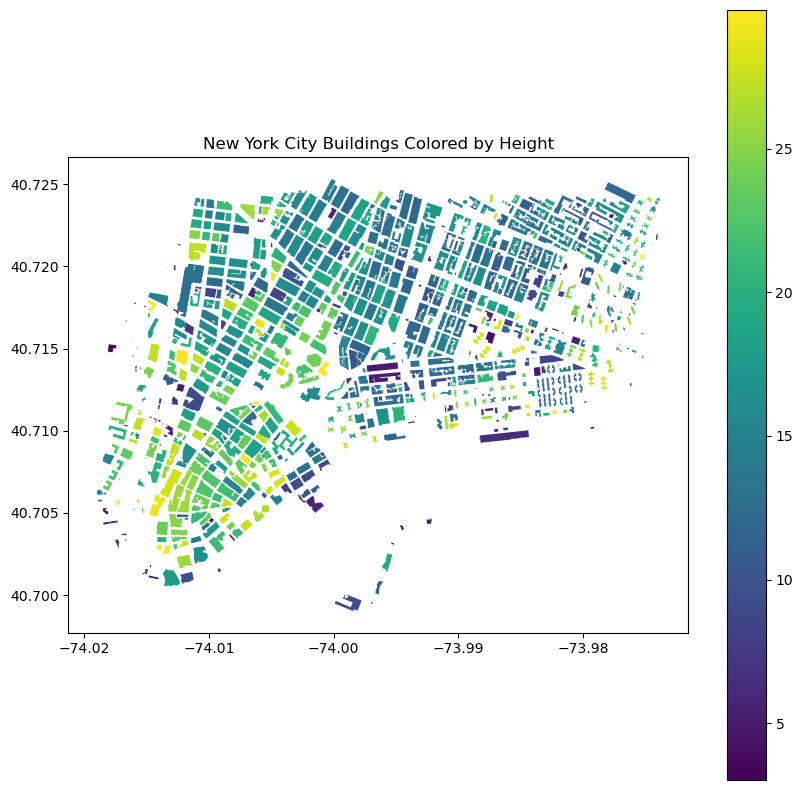

In [36]:
# 2 Plot of building footprints
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column="height_MS", cmap="viridis", legend=True, ax=ax)
ax.set_title("New York City Buildings Colored by Height")
plt.show()

In [40]:
# 3 Folium interactive map
center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]

# Create a Folium Map
m = folium.Map(location=center, zoom_start=13)

# Add buildings to the map with height-based coloring
for _, row in gdf.iterrows():
    if row.geometry is not None:
        color = "blue" if row["height_MS"] < gdf["height_MS"].mean() else "red"
        folium.GeoJson(row.geometry, style_function=lambda x, color=color: {"color": color, "weight": 1}).add_to(m)

# Save and display map
m.save("nyc_buildings_map.html")
m

C:\Users\jepep\AppData\Local\Temp\ipykernel_31228\2336320348.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]


In [41]:
# 4 Average building height 
avg_height = gdf["height_MS"].mean()
print(f"Average Building Height: {avg_height:.2f} meters")

Average Building Height: 15.45 meters


In [43]:
# 5 taller than average buildings
tall_buildings = gdf[gdf["height_MS"] > avg_height]
print(f"The number of buildings taller than the average hieght is {len(tall_buildings)}")

The number of buildings taller than the average hieght is 524


In [44]:
# saves files to geoJSON
output_file = "nyc_tall_buildings.geojson"
tall_buildings.to_file(output_file, driver="GeoJSON")
print(f"Filtered buildings saved to {output_file}")

Filtered buildings saved to nyc_tall_buildings.geojson


## Exercise 10: Combining NumPy, Pandas, and GeoPandas

This exercise requires you to combine the power of NumPy, Pandas, and GeoPandas to analyze and visualize spatial data.

1. Use Pandas to load the world cities dataset from this URL: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Filter the dataset to include only cities with latitude values between -40 and 60 (i.e., cities located in the Northern Hemisphere or near the equator).
3. Create a GeoDataFrame from the filtered dataset by converting the latitude and longitude into geometries.
4. Reproject the GeoDataFrame to the Mercator projection (EPSG:3857).
5. Calculate the distance (in meters) between each city and the city of Paris.
6. Plot the cities on a world map, coloring the points by their distance from Paris.

In [46]:
# Import packages
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopy.distance import geodesic
import contextily as ctx

In [47]:
# 1 load in dataset
url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
df = pd.read_csv(url)

# Display the first few rows
print(df.head())

   id         name country  latitude  longitude  population
0   1        Bombo     UGA    0.5833    32.5333       75000
1   2  Fort Portal     UGA    0.6710    30.2750       42670
2   3      Potenza     ITA   40.6420    15.7990       69060
3   4   Campobasso     ITA   41.5630    14.6560       50762
4   5        Aosta     ITA   45.7370     7.3150       34062


In [49]:
# 2 filters dataset
filtered_df = df[(df["latitude"] >= -40) & (df["latitude"] <= 60)]
print(f"Number of cities after filtering: {len(filtered_df)}")

Number of cities after filtering: 1132


In [51]:
# 3 geodataframe
geometry = [Point(xy) for xy in zip(filtered_df["longitude"], filtered_df["latitude"])]
gdf = gpd.GeoDataFrame(filtered_df, geometry=geometry, crs="EPSG:4326")

print(gdf.head())

   id         name country  latitude  longitude  population  \
0   1        Bombo     UGA    0.5833    32.5333       75000   
1   2  Fort Portal     UGA    0.6710    30.2750       42670   
2   3      Potenza     ITA   40.6420    15.7990       69060   
3   4   Campobasso     ITA   41.5630    14.6560       50762   
4   5        Aosta     ITA   45.7370     7.3150       34062   

                 geometry  
0  POINT (32.5333 0.5833)  
1    POINT (30.275 0.671)  
2   POINT (15.799 40.642)  
3   POINT (14.656 41.563)  
4    POINT (7.315 45.737)  


In [52]:
# 4 reprojection
gdf_mercator = gdf.to_crs(epsg=3857)

In [54]:
# 5 calculates distance to paris
paris_coords = (48.8566, 2.3522)

# Function to calculate geodesic distance
def calculate_distance(lat, lon):
    return geodesic((lat, lon), paris_coords).meters

# Apply function to compute distances
gdf["distance_to_paris"] = gdf.apply(lambda row: calculate_distance(row["latitude"], row["longitude"]), axis=1)

# Display the first few rows with distances
print(gdf[["name", "distance_to_paris"]].head())

          name  distance_to_paris
0        Bombo       6.079852e+06
1  Fort Portal       5.971604e+06
2      Potenza       1.398912e+06
3   Campobasso       1.258718e+06
4        Aosta       5.108572e+05


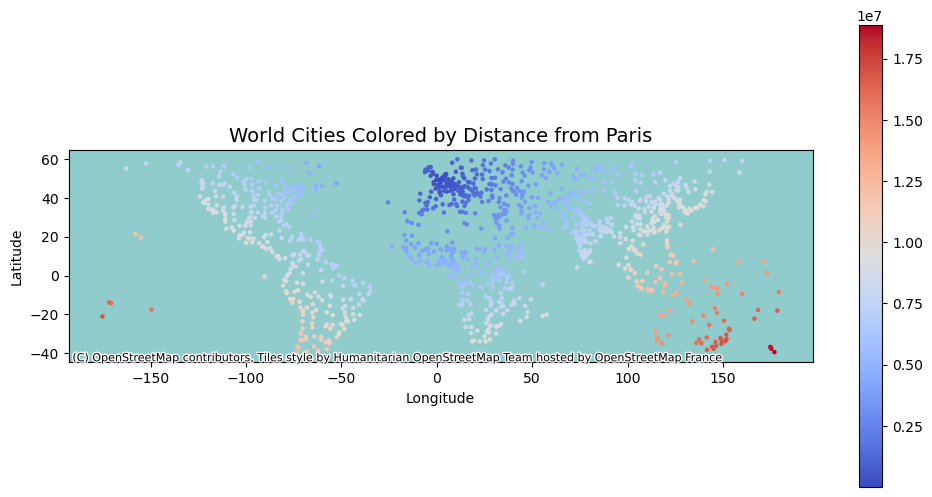

In [57]:
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(column="distance_to_paris", cmap="coolwarm", legend=True, markersize=5, ax=ax)

# Add a basemap for reference
ctx.add_basemap(ax, crs=gdf_mercator.crs)

# Customize plot
ax.set_title("World Cities Colored by Distance from Paris", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

## Submission Requirements

Complete the exercises above and and upload the notebook to your GitHub repository. Make sure the notebook has a Colab badge at the top so that it can be easily opened in Google Colab. Submit the URL of the notebook to Canvas.